In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Academic-Performance-Dataset.csv")
df

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72.0,62.0,98.0,63.0,89.0,36.0,368,73.6
1,2,Reyansh,M,IT,58.0,62.0,83.0,83.0,88.0,34.0,350,70.0
2,3,Aarav,M,IT,57.0,-20.0,100.0,NaN,56.0,36.0,192,38.4
3,4,Atharv,M,IT,60.0,89.0,83.0,70.0,33.0,23.0,298,59.6
4,5,Vivaan,M,Comp,85.0,90.0,NaN,78.0,23.0,56.0,247,49.4
5,6,Advik,M,ENTC,94.0,99.0,84.0,100.0,56.0,99.0,438,87.6
6,7,Ansh,M,ENTC,98.0,88.0,95.0,81.0,78.0,78.0,420,84.0
7,8,Ishaan,M,ENTC,75.0,66.0,51.0,83.0,-99.0,76.0,192,38.4
8,9,Dhruv,M,ENTC,63.0,NaN,NaN,97.0,56.0,55.0,208,41.6
9,10,Siddharth,M,ENTC,96.0,67.0,78.0,95.0,NaN,98.0,338,67.6


In [3]:
df.shape

(20, 12)

In [4]:
df.dtypes

Rollno           int64
Name            object
Gender          object
Branch          object
Attendence     float64
Phy_marks      float64
Che_marks      float64
EM1_marks      float64
PPS_marks      float64
SME_marks      float64
Total Marks      int64
Percentage     float64
dtype: object

In [5]:
df.isna().sum()

Rollno         0
Name           2
Gender         0
Branch         0
Attendence     0
Phy_marks      1
Che_marks      3
EM1_marks      2
PPS_marks      1
SME_marks      0
Total Marks    0
Percentage     0
dtype: int64

In [6]:
cols_with_na = []
for col in df.columns:
    if df[col].isna().any():
        cols_with_na.append(col)

cols_with_na

['Name', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks']

In [7]:
for col in cols_with_na:
    col_dt = df[col].dtypes
    if (col_dt == 'int64' or col_dt == 'float64'):
        outliers = (df[col] < 0) | (100 < df[col])
        df.loc[outliers, col] = np.nan
        df[col] = df[col].fillna(df[col].mean())
    else:
        df[col] = df[col].fillna(method='ffill')
df

C:\Users\Hardik\AppData\Local\Temp\ipykernel_8844\2570195760.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72.0,62.000000,98.000000,63.000000,89.000000,36.0,368,73.6
1,2,Reyansh,M,IT,58.0,62.000000,83.000000,83.000000,88.000000,34.0,350,70.0
2,3,Aarav,M,IT,57.0,74.058824,100.000000,83.444444,56.000000,36.0,192,38.4
3,4,Atharv,M,IT,60.0,89.000000,83.000000,70.000000,33.000000,23.0,298,59.6
4,5,Vivaan,M,Comp,85.0,90.000000,80.764706,78.000000,23.000000,56.0,247,49.4
5,6,Advik,M,ENTC,94.0,99.000000,84.000000,100.000000,56.000000,99.0,438,87.6
6,7,Ansh,M,ENTC,98.0,88.000000,95.000000,81.000000,78.000000,78.0,420,84.0
7,8,Ishaan,M,ENTC,75.0,66.000000,51.000000,83.000000,69.611111,76.0,192,38.4
8,9,Dhruv,M,ENTC,63.0,74.058824,80.764706,97.000000,56.000000,55.0,208,41.6
9,10,Siddharth,M,ENTC,96.0,67.000000,78.000000,95.000000,69.611111,98.0,338,67.6


In [8]:
df['Total Marks']=df['Phy_marks']+df['Che_marks']+df['EM1_marks']+df['PPS_marks']+df['SME_marks']
df['Percentage']=df['Total Marks']/5

df

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
0,1,Mohammed,M,Comp,72.0,62.000000,98.000000,63.000000,89.000000,36.0,348.000000,69.600000
1,2,Reyansh,M,IT,58.0,62.000000,83.000000,83.000000,88.000000,34.0,350.000000,70.000000
2,3,Aarav,M,IT,57.0,74.058824,100.000000,83.444444,56.000000,36.0,349.503268,69.900654
3,4,Atharv,M,IT,60.0,89.000000,83.000000,70.000000,33.000000,23.0,298.000000,59.600000
4,5,Vivaan,M,Comp,85.0,90.000000,80.764706,78.000000,23.000000,56.0,327.764706,65.552941
5,6,Advik,M,ENTC,94.0,99.000000,84.000000,100.000000,56.000000,99.0,438.000000,87.600000
6,7,Ansh,M,ENTC,98.0,88.000000,95.000000,81.000000,78.000000,78.0,420.000000,84.000000
7,8,Ishaan,M,ENTC,75.0,66.000000,51.000000,83.000000,69.611111,76.0,345.611111,69.122222
8,9,Dhruv,M,ENTC,63.0,74.058824,80.764706,97.000000,56.000000,55.0,362.823529,72.564706
9,10,Siddharth,M,ENTC,96.0,67.000000,78.000000,95.000000,69.611111,98.0,407.611111,81.522222


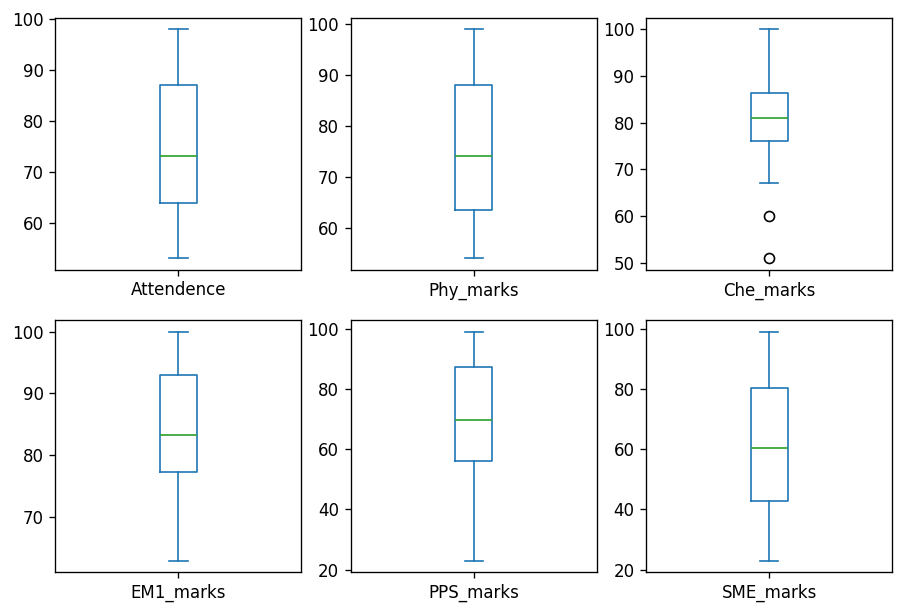

In [9]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 6)
df_list = ['Attendence', 'Phy_marks', 'Che_marks', 'EM1_marks', 'PPS_marks', 'SME_marks']
fig, axes = plt.subplots(2, 3)
fig.set_dpi(120)

count=0
for r in range(2):
    for c in range(3):
        _ = df[df_list[count]].plot(kind = 'box', ax=axes[r,c])
        count+=1

In [10]:
Q1 = df['Che_marks'].quantile(0.25)
Q3 = df['Che_marks'].quantile(0.75)
IQR = Q3 - Q1

Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

print(f'Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, Lower_limit = {Lower_limit}, Upper_limit = {Upper_limit}')


Q1 = 76.0, Q3 = 86.25, IQR = 10.25, Lower_limit = 60.625, Upper_limit = 101.625


In [11]:
df[(df['Che_marks'] < Lower_limit) | (df['Che_marks'] > Upper_limit)]

,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage
7,8,Ishaan,M,ENTC,75.0,66.0,51.0,83.0,69.611111,76.0,345.611111,69.122222
14,15,Maryam,F,IT,64.0,87.0,60.0,90.0,65.000000,90.0,392.000000,78.400000


In [12]:
def BinningFunction(column, cut_points, labels = None) :
    break_points=[column.min()] + cut_points + [column.max( )]
    print('Gradding According to percentage \n>60 = F \n60-70 = B \n70-80 = A\n80-100 = O')
    return pd.cut(column, bins=break_points, labels=labels, include_lowest=True)

In [13]:
cut_points=[60, 70, 80]
labels=['F', 'B', 'A', 'O']
df['Grade']=BinningFunction(df['Percentage'], cut_points, labels)

df

Gradding According to percentage 
>60 = F 
60-70 = B 
70-80 = A
80-100 = O


,Rollno,Name,Gender,Branch,Attendence,Phy_marks,Che_marks,EM1_marks,PPS_marks,SME_marks,Total Marks,Percentage,Grade
0,1,Mohammed,M,Comp,72.0,62.000000,98.000000,63.000000,89.000000,36.0,348.000000,69.600000,B
1,2,Reyansh,M,IT,58.0,62.000000,83.000000,83.000000,88.000000,34.0,350.000000,70.000000,B
2,3,Aarav,M,IT,57.0,74.058824,100.000000,83.444444,56.000000,36.0,349.503268,69.900654,B
3,4,Atharv,M,IT,60.0,89.000000,83.000000,70.000000,33.000000,23.0,298.000000,59.600000,F
4,5,Vivaan,M,Comp,85.0,90.000000,80.764706,78.000000,23.000000,56.0,327.764706,65.552941,B
5,6,Advik,M,ENTC,94.0,99.000000,84.000000,100.000000,56.000000,99.0,438.000000,87.600000,O
6,7,Ansh,M,ENTC,98.0,88.000000,95.000000,81.000000,78.000000,78.0,420.000000,84.000000,O
7,8,Ishaan,M,ENTC,75.0,66.000000,51.000000,83.000000,69.611111,76.0,345.611111,69.122222,B
8,9,Dhruv,M,ENTC,63.0,74.058824,80.764706,97.000000,56.000000,55.0,362.823529,72.564706,A
9,10,Siddharth,M,ENTC,96.0,67.000000,78.000000,95.000000,69.611111,98.0,407.611111,81.522222,O
